In [1]:
using Pkg,Plots
Pkg.activate("..")
using OpenSAFT

 Activating environment at `~/Documents/University/UROP/SAFT codes/OpenSAFT/Project.toml`


In this notebook we will try to replicate various figures from Huang and Radosz's 1991 paper

## Figure 7

In [2]:
# Initiate system
propanol2 = system(["2-propanol"],"CKSAFT")
mix = system(["carbon dioxide","2-propanol"],"CKSAFT");

In [3]:
# Obtain saturation pressure of less volatile component
T = [298,394]
A = get_sat_pure.(propanol2, T)
P_sat = [A[i][1] for i in 1:length(T)];

In [4]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-3,0.815,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_1,v_l,v_v,y) = get_bubble_pressure(mix, 394, x);

# Concantenate results
x_1 = x[:,1]
y_1 = y[:,1]
pushfirst!(x_1,0.)
pushfirst!(y_1,0.)
pushfirst!(P_sat_mix_1,P_sat[2]);

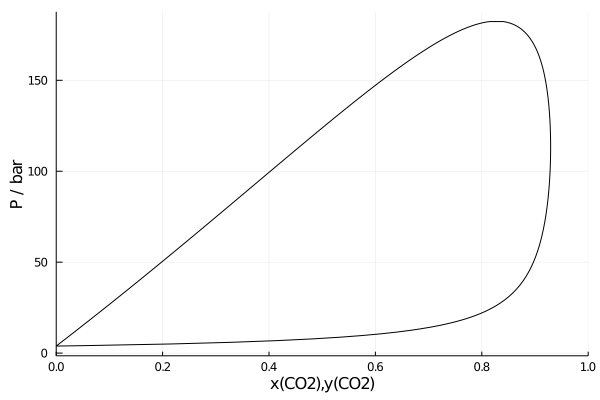

In [5]:
# Plotting
z_1 = vcat(x_1,reverse(y_1))
P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1))


plt = plot(z_1,P_sat_mix_1/1e5,color=:black,label="",xlabel="x(CO2),y(CO2)",ylabel="P / bar",xlim=(0,1))
# plt = plot!(z_2,P_sat_mix_2/1e5,color=:black,label="",xlabel="x(methane),y(methane)",ylabel="P / bar")
display(plt)